In [2]:
import pandas as pd
import numpy as np 

In [3]:
Df_dataset = pd.read_csv('Titanic.csv')


In [4]:
Df_dataset.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket Booking Period,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,< 1 week,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2 weeks,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2 weeks,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3 weeks,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,< 1 week,373450,8.0500,NaN,S


In [5]:
Df_dataset.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket Booking Period,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,< 1 week,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,3 weeks,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,4+ weeks,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,< 1 week,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,< 1 week,370376,7.75,NaN,Q


In [6]:
Df_dataset.dtypes

PassengerId                int64
Survived                   int64
Pclass                     int64
Name                      object
Gender                    object
Age                      float64
SibSp                      int64
Parch                      int64
Ticket Booking Period     object
Ticket                    object
Fare                     float64
Cabin                     object
Embarked                  object
dtype: object

In [7]:
Df_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
Df_dataset['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
#– Removing irrelevant columns
Df_dataset.drop(['Name','SibSp','Ticket'], axis=1, inplace=True)

#### Having large number of missing values is a huge effect for the analysis of data, for that we will remove the columns which have more than 30% of missing values. We are going to remove the empty rows also.


In [18]:
#– Handling missing data
col_num=0
TotalObjects =Df_dataset.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in Df_dataset:
    nullCount =Df_dataset[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 30 :
        col_num=col_num+1
        Df_dataset.drop(x, axis=1,inplace=True)
        print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !") 

Column					 Null Values%
A total of 0 deleted !


In [20]:
Df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId              891 non-null int64
Survived                 891 non-null int64
Pclass                   891 non-null int64
Gender                   891 non-null object
Age                      714 non-null float64
Parch                    891 non-null int64
Ticket Booking Period    890 non-null object
Fare                     891 non-null float64
Embarked                 889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [21]:
Df_dataset ['Embarked'].fillna('Unknown',inplace = True)
Df_dataset['Age'].fillna(0, inplace=True)

In [ ]:
Df_dataset

In [23]:
Df_dataset['Age'].fillna(Df_dataset['Age'].mean(), inplace=True)

In [25]:
Df_dataset['Ticket Booking Period'].fillna(0, inplace=True)

In [26]:
Df_dataset.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Gender                   0
Age                      0
Parch                    0
Ticket Booking Period    0
Fare                     0
Embarked                 0
dtype: int64

In [27]:
#– Formatting data
pd.unique(Df_dataset['Ticket Booking Period'].values)

array(['< 1 week', '2 weeks', '3 weeks', '4+ weeks', 0], dtype=object)

In [28]:
def CalculateTicketBookingPeriod(week):
    if week == '< 1 week':
        return 0.5
    elif week == '4+ weeks':
        return 4
    else:
        wk=str(week)
        return wk.rstrip('weeks')

In [30]:
Df_dataset['Ticket Booking Period']=Df_dataset['Ticket Booking Period'].apply(CalculateTicketBookingPeriod)

In [31]:
Df_dataset['Ticket Booking Period']

0      0.5
1       2 
2       2 
3       3 
4      0.5
5      0.5
6        4
7       2 
8      0.5
9       3 
10      2 
11       4
12       4
13      3 
14     0.5
15       4
16      2 
17      3 
18       4
19     0.5
20     0.5
21      3 
22      2 
23       4
24       4
25      3 
26     0.5
27     0.5
28       4
29      2 
      ... 
861     3 
862    0.5
863    0.5
864      4
865     2 
866     3 
867     2 
868    0.5
869     2 
870     3 
871      4
872      4
873    0.5
874     3 
875      4
876    0.5
877     3 
878    0.5
879     3 
880    0.5
881      4
882    0.5
883    0.5
884      4
885     2 
886    0.5
887     3 
888      4
889    0.5
890    0.5
Name: Ticket Booking Period, Length: 891, dtype: object

In [32]:
#Dealing with categorical Data
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
Df_dataset["Gender"]= Df_dataset["Gender"].apply(getNumber)

In [33]:
Df_dataset["Gender"]

0      1
1      2
2      2
3      2
4      1
5      1
6      1
7      1
8      2
9      2
10     2
11     2
12     1
13     1
14     2
15     2
16     1
17     1
18     2
19     2
20     1
21     1
22     2
23     1
24     2
25     2
26     1
27     1
28     2
29     1
      ..
861    1
862    2
863    2
864    1
865    2
866    2
867    1
868    1
869    1
870    1
871    2
872    1
873    1
874    2
875    2
876    1
877    1
878    1
879    2
880    2
881    1
882    2
883    1
884    1
885    2
886    1
887    2
888    2
889    1
890    1
Name: Gender, Length: 891, dtype: int64

In [34]:
def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3


In [35]:
Df_dataset["Embarked"]=Df_dataset["Embarked"].apply(getEmb)
Df_dataset.head()

,PassengerId,Survived,Pclass,Gender,Age,Parch,Ticket Booking Period,Fare,Embarked
0,1,0,3,1,22.0,0,0.5,7.2500,1
1,2,1,1,2,38.0,0,2,71.2833,3
2,3,1,3,2,26.0,0,2,7.9250,1
3,4,1,1,2,35.0,0,3,53.1000,1
4,5,0,3,1,35.0,0,0.5,8.0500,1


In [37]:
#Save to a csv
Df_dataset . to_csv('cleaned_dataset.csv',index=False)

In [38]:
#– Visualization
import matplotlib.pyplot as plt
from matplotlib import style

577
314


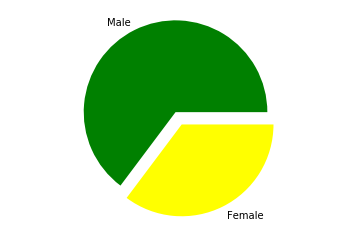

In [39]:
males = (Df_dataset['Gender'] == 1).sum()
#Summing up all the values of column gender with a
#condition for male and similary for females
females = (Df_dataset['Gender'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p, #giving array
 labels = ['Male', 'Female'], #Correspndingly giving labels
 colors = ['green', 'yellow'], # Corresponding colors
 explode = (0.15, 0), #How much the gap should me there between the pies
 startangle = 0) #what start angle should be given
plt.axis('equal')
plt.show()

109
468
233
81


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


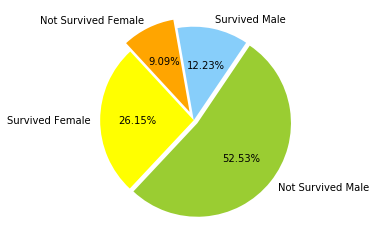

In [40]:
MaleS=Df_dataset[Df_dataset.Gender==1][Df_dataset.Survived==1].shape[0]
print(MaleS)

MaleN=Df_dataset[Df_dataset.Gender==1][Df_dataset.Survived==0].shape[0]
print(MaleN)

FemaleS=Df_dataset[Df_dataset.Gender==2][Df_dataset.Survived==1].shape[0]
print(FemaleS)

FemaleN=Df_dataset[Df_dataset.Gender==2][Df_dataset.Survived==0].shape[0]
print(FemaleN)

chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']

labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]

explode=[0,0.05,0,0.1]

plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()